In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
nor_rawdata = pd.read_csv("14020_20231216-013313.csv", delimiter=';', skiprows=1)

In [3]:
nor_rawdata.head()

,type of registration,month,Private cars,Vans and motorhomes,Lorries
0,New vehicles,1998M01,9639,1982,483
1,New vehicles,1998M02,9687,1644,390
2,New vehicles,1998M03,12913,1930,446
3,New vehicles,1998M04,12349,1758,465
4,New vehicles,1998M05,14269,1761,436


#### Reading and Understanding the JSON Data Structure
First, I load the JSON file as a dictionary in Python. This allows me to programmatically access the contents of the JSON file.

In [4]:
import json

json_file_path = 'TEM21.20231215T231250.json'
with open(json_file_path, 'r') as file:
    json_dict = json.load(file)


#### Identifying Relevant Data Keys
Inside the JSON file, I focus on the dataset key, specifically the dimension and value keys under it. dimension holds the dimensions (classifications) of the data set and their labels. value contains the numerical data.

In [5]:
dimension_keys = list(json_dict['dataset']['dimension'].keys())
values = json_dict['dataset']['value']


#### Creating Label Maps for Dimensions
For each dimension, I create mappings between their indices and labels. This is important for later associating numerical data with meaningful labels.

In [6]:
statistic_info = json_dict['dataset']['dimension']['STATISTIC']['category']
months_info = json_dict['dataset']['dimension']['TLIST(M1)']['category']
taxation_class_info = json_dict['dataset']['dimension']['C02172V02618']['category']

statistic_label_map = statistic_info['label']
month_label_map = months_info['label']
taxation_class_label_map = taxation_class_info['label']


#### Generating All Combinations of Dimensions
Using itertools.product, I generate all possible combinations of the STATISTIC, TLIST(M1), and C02172V02618 dimensions. These combinations represent the order of the numerical data in the value key.

In [7]:
import itertools
dimension_combinations = list(itertools.product(
    statistic_info['index'].keys(),
    months_info['index'].keys(),
    taxation_class_info['index'].keys()
))

#### Merging Numerical Data with Labels
For each combination of dimensions, I extract the corresponding numerical value from the value list and store it in a list along with its relevant labels. This process is repeated for all combinations and values.

In [8]:
unpacked_values = []
for combo in dimension_combinations:
    statistic, month, taxation_class = combo
    value = values.pop(0)  # Pop the first value from the list
    unpacked_values.append([
        statistic, statistic_label_map[statistic], 
        month, month_label_map[month], 
        taxation_class, taxation_class_label_map.get(taxation_class, '-'), 
        value
    ])

#### Creating the DataFrame
I convert the data I've gathered into a pandas DataFrame. This DataFrame contains a row for each combination of dimensions along with the associated numerical value.

In [9]:
ir_rawdata = pd.DataFrame(unpacked_values, columns=[
    'STATISTIC', 'Statistic Label', 'TList(M1)', 'Month', 
    'C02172V02618', 'Taxation Class', 'VALUE'
])
ir_rawdata.head(50)

,STATISTIC,Statistic Label,TList(M1),Month,C02172V02618,Taxation Class,VALUE
0,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,011,New Private Cars,17192.0
1,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,012,New Goods Vehicles,2518.0
2,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,021,Secondhand Private Cars,2969.0
3,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,022,Secondhand Goods Vehicles,386.0
4,TEM21C01,Vehicles Licensed for the First Time,199802,1998M02,011,New Private Cars,15480.0
5,TEM21C01,Vehicles Licensed for the First Time,199802,1998M02,012,New Goods Vehicles,2377.0
6,TEM21C01,Vehicles Licensed for the First Time,199802,1998M02,021,Secondhand Private Cars,3244.0
7,TEM21C01,Vehicles Licensed for the First Time,199802,1998M02,022,Secondhand Goods Vehicles,434.0
8,TEM21C01,Vehicles Licensed for the First Time,199803,1998M03,011,New Private Cars,14703.0
9,TEM21C01,Vehicles Licensed for the First Time,199803,1998M03,012,New Goods Vehicles,2366.0


In [10]:
missing_values = ir_rawdata.isnull().sum()
print(missing_values)

STATISTIC           0
Statistic Label     0
TList(M1)           0
Month               0
C02172V02618        0
Taxation Class      0
VALUE              12
dtype: int64


In [11]:
dfir = ir_rawdata[ir_rawdata["Statistic Label"]=="Vehicles Licensed for the First Time"]
dfir = dfir[(dfir['Taxation Class'] == 'New Private Cars') | (dfir['Taxation Class'] == 'New Goods Vehicles')]

dfir.head()

,STATISTIC,Statistic Label,TList(M1),Month,C02172V02618,Taxation Class,VALUE
0,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,011,New Private Cars,17192.0
1,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,012,New Goods Vehicles,2518.0
4,TEM21C01,Vehicles Licensed for the First Time,199802,1998M02,011,New Private Cars,15480.0
5,TEM21C01,Vehicles Licensed for the First Time,199802,1998M02,012,New Goods Vehicles,2377.0
8,TEM21C01,Vehicles Licensed for the First Time,199803,1998M03,011,New Private Cars,14703.0


In [12]:
missing_values = dfir.isnull().sum()
print(missing_values)


STATISTIC          0
Statistic Label    0
TList(M1)          0
Month              0
C02172V02618       0
Taxation Class     0
VALUE              0
dtype: int64


In [13]:
dfir.describe(include="all")

,STATISTIC,Statistic Label,TList(M1),Month,C02172V02618,Taxation Class,VALUE
count,622,622,622,622,622,622,622.000000
unique,1,1,311,311,2,2,NaN
top,TEM21C01,Vehicles Licensed for the First Time,199801,1998M01,011,New Private Cars,NaN
freq,622,622,2,2,311,311,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6373.704180
std,NaN,NaN,NaN,NaN,NaN,NaN,6730.183572
min,NaN,NaN,NaN,NaN,NaN,NaN,238.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1813.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3074.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,9361.250000


In [14]:
del dfir["STATISTIC"]
del dfir["Statistic Label"]
del dfir["TList(M1)"]
del dfir["C02172V02618"]

dfir.head()

,Month,Taxation Class,VALUE
0,1998M01,New Private Cars,17192.0
1,1998M01,New Goods Vehicles,2518.0
4,1998M02,New Private Cars,15480.0
5,1998M02,New Goods Vehicles,2377.0
8,1998M03,New Private Cars,14703.0


In [15]:
dfir = dfir.pivot_table(index='Month', columns='Taxation Class', values='VALUE')

dfir.reset_index(inplace=True)


In [16]:
dfir["Total New Vehicles"]= dfir["New Goods Vehicles"] + dfir["New Private Cars"]
dfir.head()

Taxation Class,Month,New Goods Vehicles,New Private Cars,Total New Vehicles
0,1998M01,2518.0,17192.0,19710.0
1,1998M02,2377.0,15480.0,17857.0
2,1998M03,2366.0,14703.0,17069.0
3,1998M04,2507.0,16903.0,19410.0
4,1998M05,2172.0,15921.0,18093.0


In [17]:
dfir['New Goods Vehicles'], dfir['New Private Cars'] = dfir['New Private Cars'], dfir['New Goods Vehicles']
dfir.head()

Taxation Class,Month,New Goods Vehicles,New Private Cars,Total New Vehicles
0,1998M01,17192.0,2518.0,19710.0
1,1998M02,15480.0,2377.0,17857.0
2,1998M03,14703.0,2366.0,17069.0
3,1998M04,16903.0,2507.0,19410.0
4,1998M05,15921.0,2172.0,18093.0


In [18]:
dfir = dfir.rename(columns={'New Goods Vehicles': 'New Private Cars', 'New Private Cars': 'New Goods Vehicles'})
dfir.head()

Taxation Class,Month,New Private Cars,New Goods Vehicles,Total New Vehicles
0,1998M01,17192.0,2518.0,19710.0
1,1998M02,15480.0,2377.0,17857.0
2,1998M03,14703.0,2366.0,17069.0
3,1998M04,16903.0,2507.0,19410.0
4,1998M05,15921.0,2172.0,18093.0


In [19]:
print(nor_rawdata.columns)

Index(['type of registration', 'month', 'Private cars', 'Vans and motorhomes',
       'Lorries'],
      dtype='object')


In [20]:
nor_rawdata["New Private Cars"]=nor_rawdata["Private cars"]
nor_rawdata["New Goods Vehicles"]=nor_rawdata["Vans and motorhomes"] + nor_rawdata["Lorries"]
nor_rawdata["Total New Vehicles"]= nor_rawdata["New Private Cars"] + nor_rawdata["New Goods Vehicles"]
nor_rawdata.head()

,type of registration,month,Private cars,Vans and motorhomes,Lorries,New Private Cars,New Goods Vehicles,Total New Vehicles
0,New vehicles,1998M01,9639,1982,483,9639,2465,12104
1,New vehicles,1998M02,9687,1644,390,9687,2034,11721
2,New vehicles,1998M03,12913,1930,446,12913,2376,15289
3,New vehicles,1998M04,12349,1758,465,12349,2223,14572
4,New vehicles,1998M05,14269,1761,436,14269,2197,16466


In [21]:
dfnor=nor_rawdata.copy()
dfnor.head()

,type of registration,month,Private cars,Vans and motorhomes,Lorries,New Private Cars,New Goods Vehicles,Total New Vehicles
0,New vehicles,1998M01,9639,1982,483,9639,2465,12104
1,New vehicles,1998M02,9687,1644,390,9687,2034,11721
2,New vehicles,1998M03,12913,1930,446,12913,2376,15289
3,New vehicles,1998M04,12349,1758,465,12349,2223,14572
4,New vehicles,1998M05,14269,1761,436,14269,2197,16466


In [22]:
del dfnor["type of registration"]
del dfnor["Private cars"]
del dfnor["Vans and motorhomes"]
del dfnor["Lorries"]
dfnor.head()

,month,New Private Cars,New Goods Vehicles,Total New Vehicles
0,1998M01,9639,2465,12104
1,1998M02,9687,2034,11721
2,1998M03,12913,2376,15289
3,1998M04,12349,2223,14572
4,1998M05,14269,2197,16466


In [23]:
dfnor.shape

(311, 4)

In [24]:
dfir.shape

(311, 4)

In [25]:
dfir.describe()

Taxation Class,New Private Cars,New Goods Vehicles,Total New Vehicles
count,311.000000,311.000000,311.00000
mean,10610.672026,2136.736334,12747.40836
std,7317.589305,1081.725915,8188.89168
min,474.000000,238.000000,725.00000
25%,4166.000000,1196.000000,5805.50000
50%,9362.000000,2115.000000,11181.00000
75%,15830.500000,2798.000000,18647.50000
max,32961.000000,6361.000000,37227.00000


In [26]:
ireland_descriptive_stats = dfir.describe()

norway_descriptive_stats = dfnor.describe()

comparison_descriptive = pd.concat([ireland_descriptive_stats, norway_descriptive_stats], axis=1, keys=['Ireland', 'Norway'])
comparison_descriptive

Ireland                                        \
Taxation Class New Private Cars New Goods Vehicles Total New Vehicles   
count                311.000000         311.000000          311.00000   
mean               10610.672026        2136.736334        12747.40836   
std                 7317.589305        1081.725915         8188.89168   
min                  474.000000         238.000000          725.00000   
25%                 4166.000000        1196.000000         5805.50000   
50%                 9362.000000        2115.000000        11181.00000   
75%                15830.500000        2798.000000        18647.50000   
max                32961.000000        6361.000000        37227.00000   

                         Norway                                        
Taxation Class New Private Cars New Goods Vehicles Total New Vehicles  
count                311.000000         311.000000         311.000000  
mean               11289.421222        2821.758842       14111.180064  
std                 2854.047899         740.739280        3323.465242  
min                 1861.000000        1399.000000        3260.000000  
25%                 9667.000000        2218.500000       12096.000000  
50%                11014.000000        2796.000000       13868.000000  
75%                12449.500000        3270.000000       15645.000000  
max                39499.000000        5795.000000       43804.000000

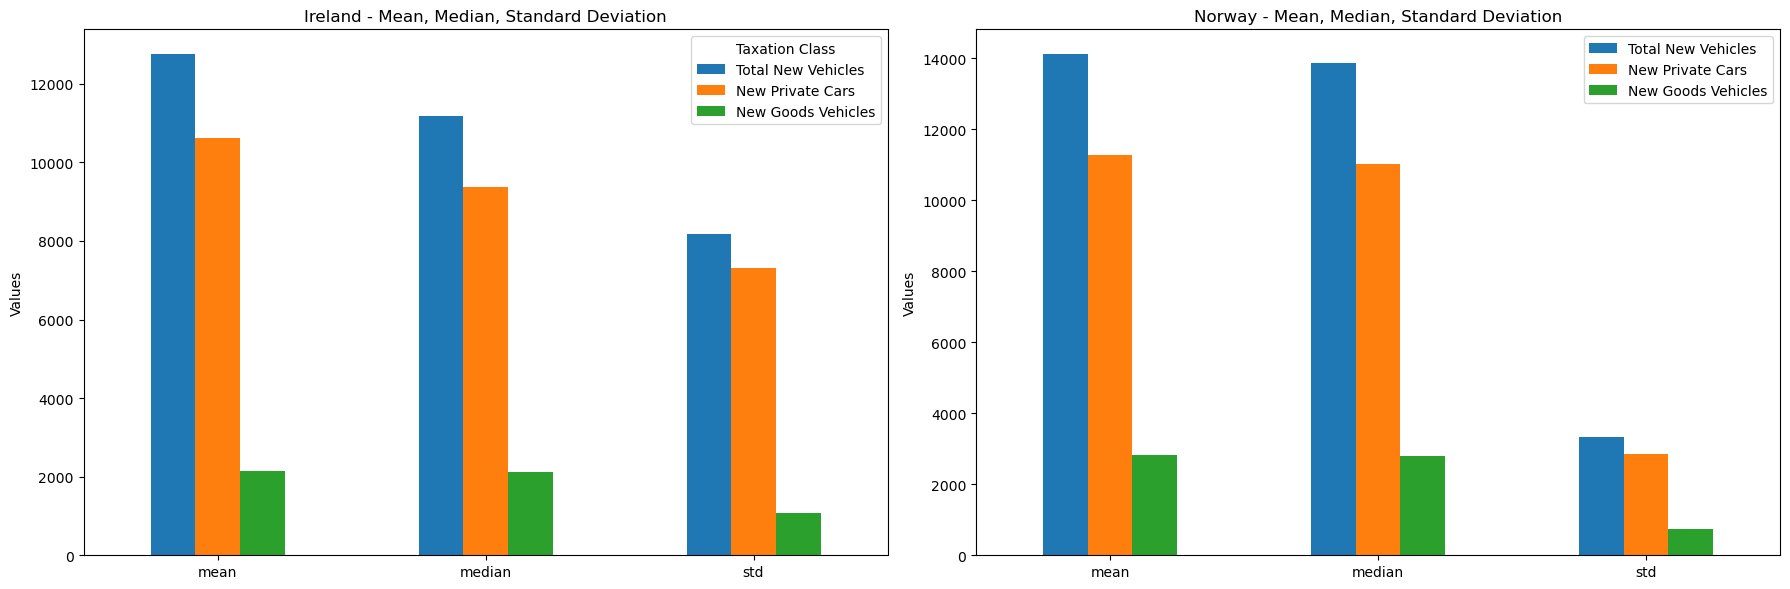

In [27]:
stats_ir = dfir[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].agg(['mean', 'median', 'std'])

stats_nor = dfnor[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].agg(['mean', 'median', 'std'])

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
stats_ir.plot(kind='bar', ax=plt.gca())
plt.title('Ireland - Mean, Median, Standard Deviation')
plt.ylabel('Values')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
stats_nor.plot(kind='bar', ax=plt.gca())
plt.title('Norway - Mean, Median, Standard Deviation')
plt.ylabel('Values')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

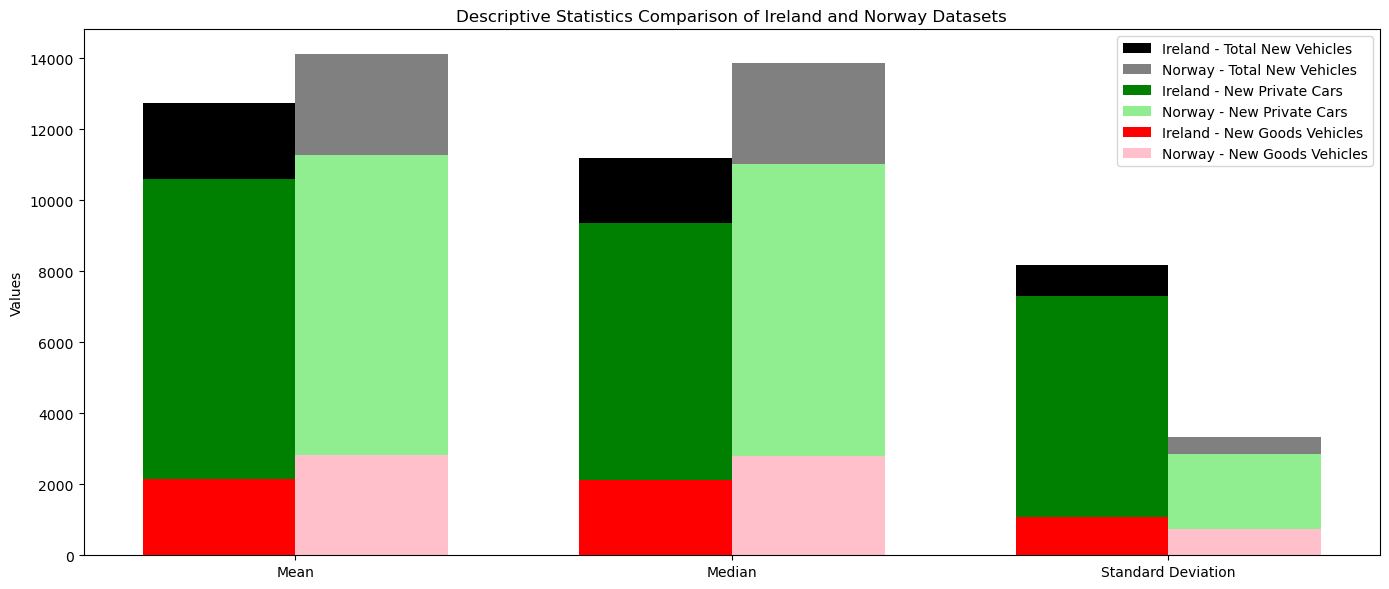

In [28]:
stats_ir = dfir[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].agg(['mean', 'median', 'std'])
stats_nor = dfnor[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].agg(['mean', 'median', 'std'])

colors_ir = ['black', 'green', 'red']
colors_nor = ['gray', 'lightgreen', 'pink']

bar_width = 0.35
index = np.arange(len(stats_ir))

plt.figure(figsize=(14, 6))

for i, col in enumerate(stats_ir.columns):
    plt.bar(index - bar_width/2, stats_ir[col], bar_width, label=f'Ireland - {col}', color=colors_ir[i])
    plt.bar(index + bar_width/2, stats_nor[col], bar_width, label=f'Norway - {col}', color=colors_nor[i])

plt.title('Descriptive Statistics Comparison of Ireland and Norway Datasets')
plt.xticks(index, ['Mean', 'Median', 'Standard Deviation'])
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

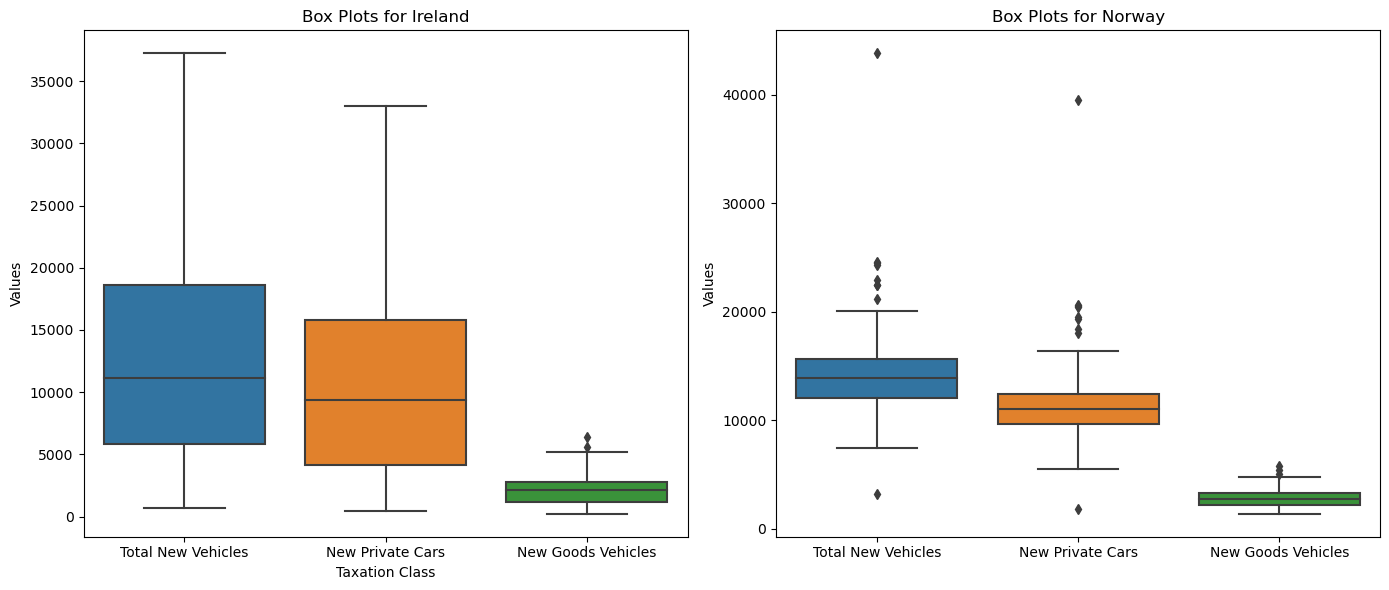

In [29]:
import seaborn as sns
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=dfir[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']])
plt.title('Box Plots for Ireland')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
sns.boxplot(data=dfnor[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']])
plt.title('Box Plots for Norway')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

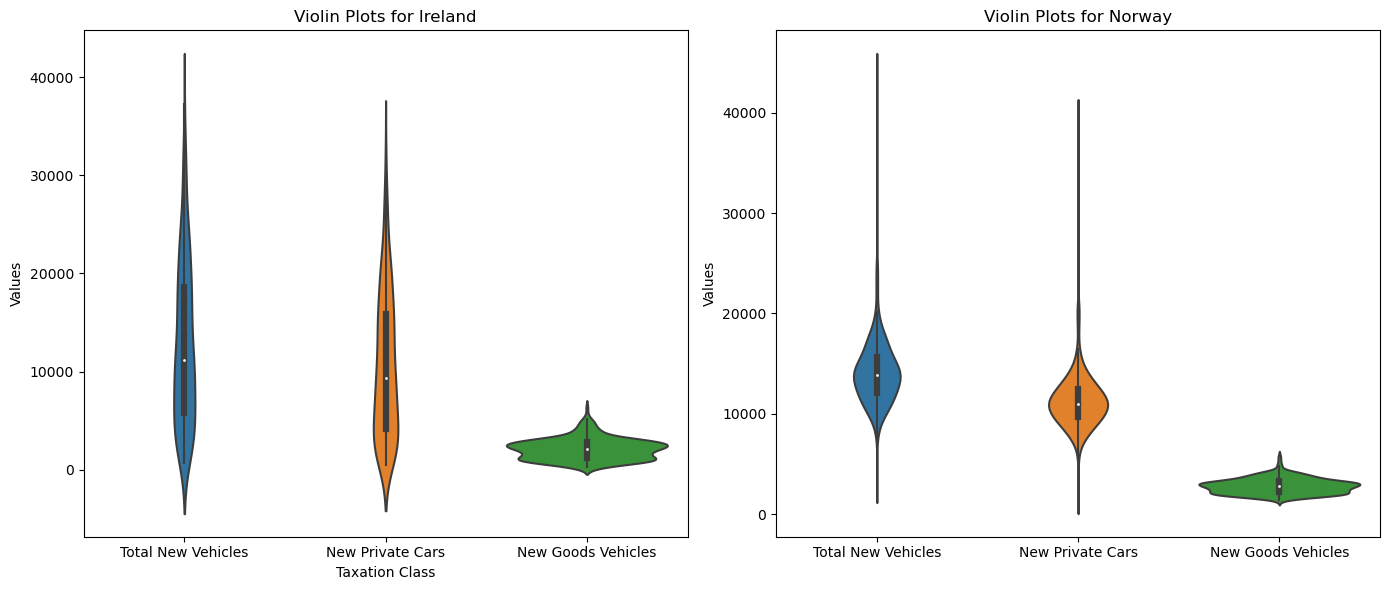

In [30]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=dfir[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']])
plt.title('Violin Plots for Ireland')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
sns.violinplot(data=dfnor[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']])
plt.title('Violin Plots for Norway')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

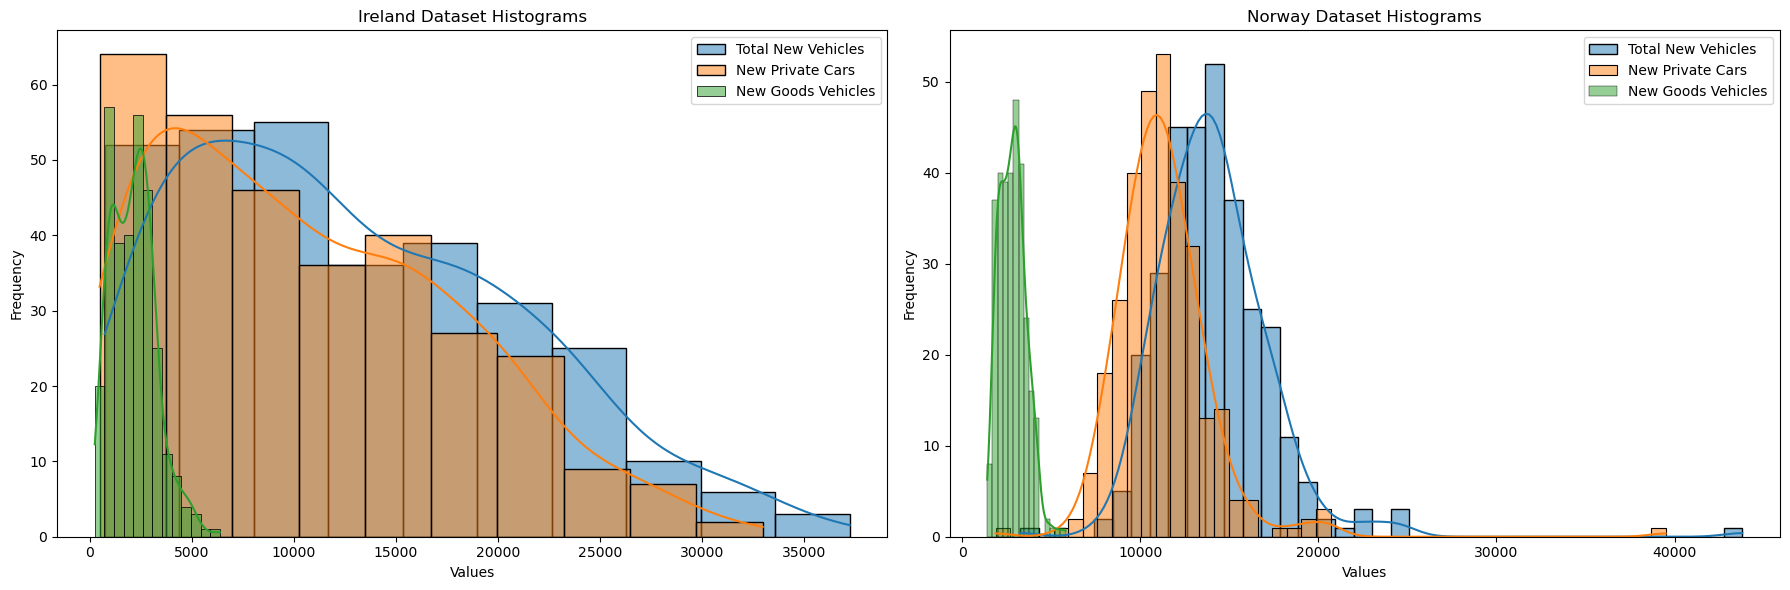

In [31]:
selected_columns = ['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
for col in selected_columns:
    sns.histplot(dfir[col], kde=True, label=col)
plt.title('Ireland Dataset Histograms')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
for col in selected_columns:
    sns.histplot(dfnor[col], kde=True, label=col)
plt.title('Norway Dataset Histograms')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

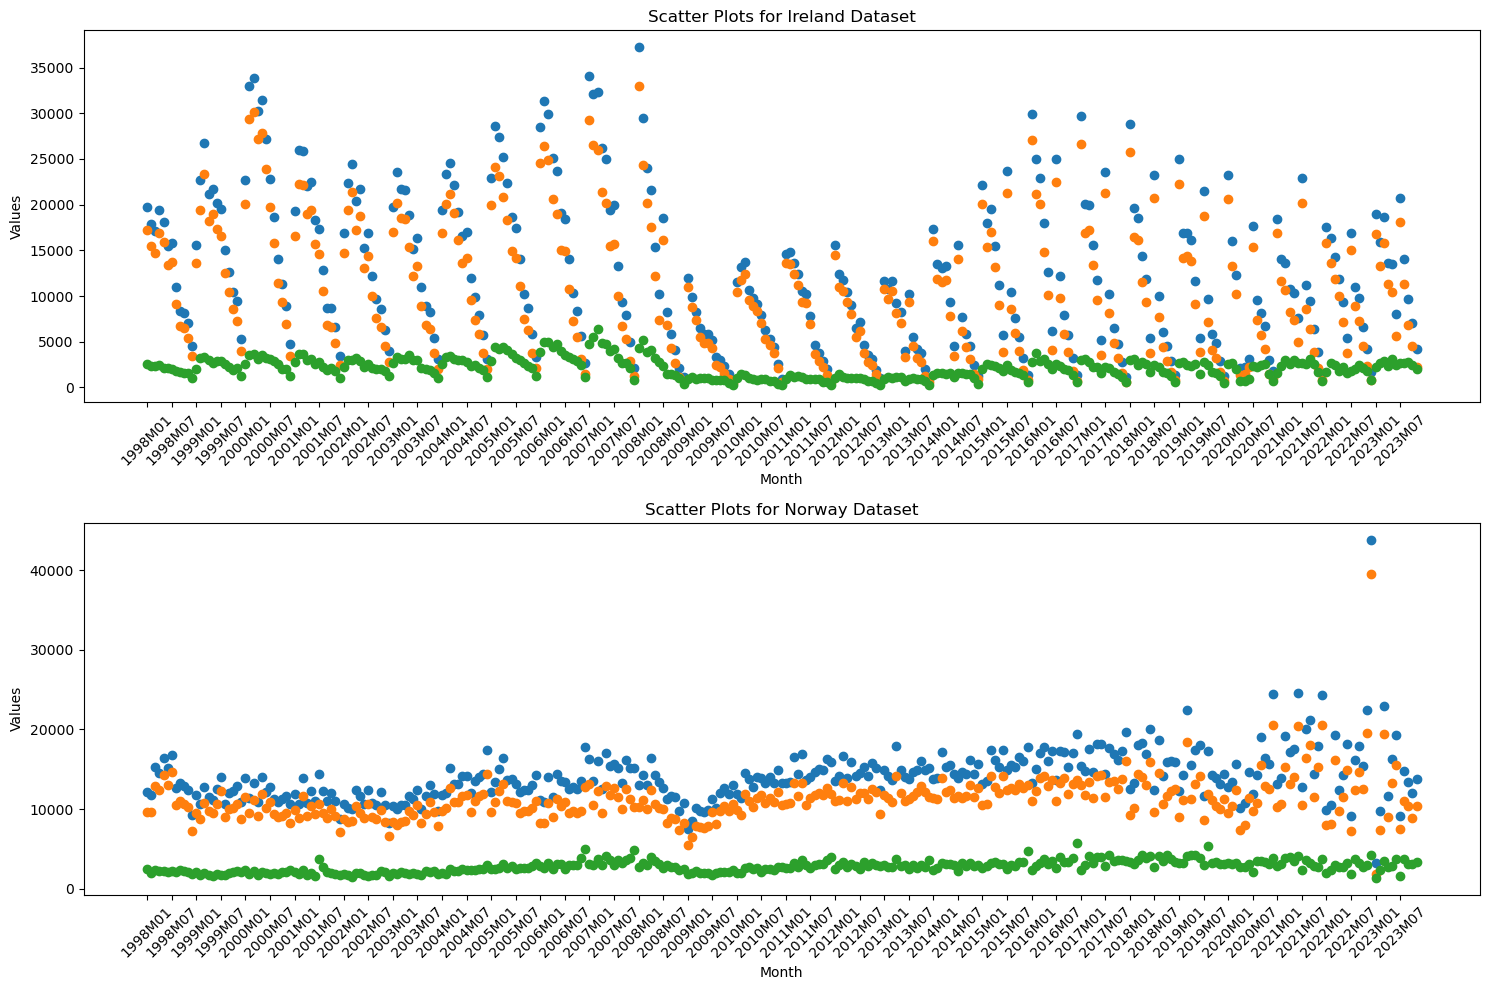

In [32]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
for col in ['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']:
    plt.scatter(x=dfir['Month'], y=dfir[col], label=col)
plt.title('Scatter Plots for Ireland Dataset')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.gca().set_xticks(dfir['Month'][::6])  

plt.subplot(2, 1, 2)
for col in ['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']:
    plt.scatter(x=dfnor['month'], y=dfnor[col], label=col)
plt.title('Scatter Plots for Norway Dataset')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.gca().set_xticks(dfnor['month'][::6]) 

plt.tight_layout()
plt.show()


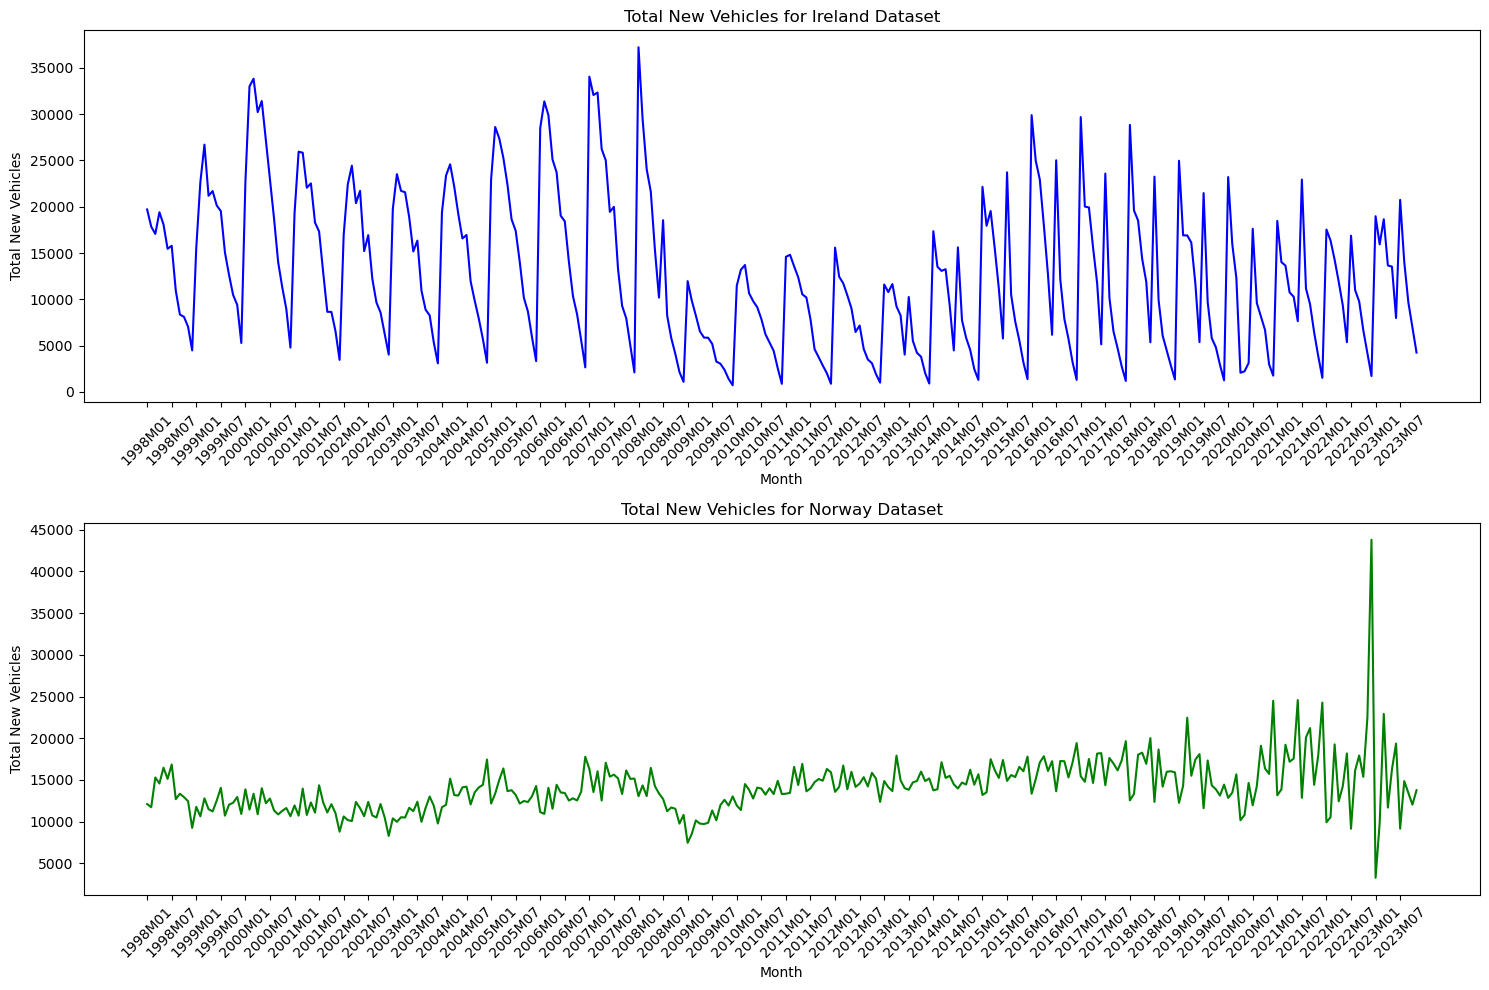

In [33]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(dfir['Month'], dfir['Total New Vehicles'], label='Total New Vehicles', color='blue')
plt.title('Total New Vehicles for Ireland Dataset')
plt.xlabel('Month')
plt.ylabel('Total New Vehicles')
plt.xticks(rotation=45)
plt.gca().set_xticks(dfir['Month'][::6]) 

plt.subplot(2, 1, 2)
plt.plot(dfnor['month'], dfnor['Total New Vehicles'], label='Total New Vehicles', color='green')
plt.title('Total New Vehicles for Norway Dataset')
plt.xlabel('Month')
plt.ylabel('Total New Vehicles')
plt.xticks(rotation=45)
plt.gca().set_xticks(dfnor['month'][::6])

plt.tight_layout()
plt.show()


## 2. Inferential Statistics

burada Month sutunundaki verilerde M harfi yer aldigi icin belli bir grup olarak ikiye bolme de sikinti yasadim ve bunu M harfini tum data setinden kaldirmakta buldum

In [34]:
dfir['Month'] = dfir['Month'].str.replace('M', '').astype(int)
dfnor['month'] = dfnor['month'].str.replace('M', '').astype(int)

In [35]:
ir_popu = pd.read_csv("PEA15.Population.csv")
ir_popu.head()

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1998,Population,Thousand,3703.1
1,Annual Population Change,1999,Population,Thousand,3741.6
2,Annual Population Change,2000,Population,Thousand,3789.5
3,Annual Population Change,2001,Population,Thousand,3847.2
4,Annual Population Change,2002,Population,Thousand,3917.2


In [36]:
del ir_popu["STATISTIC Label"]
del ir_popu["Component"]
del ir_popu["UNIT"]
ir_popu["Population"] = ir_popu["VALUE"]*1000
del ir_popu["VALUE"]
ir_popu.head()

,Year,Population
0,1998,3703100.0
1,1999,3741600.0
2,2000,3789500.0
3,2001,3847200.0
4,2002,3917200.0


In [37]:
dfir_yearly = dfir.copy()
dfir_yearly['Year'] = (dfir_yearly['Month'] // 100).astype(int)
dfir_yearly = dfir_yearly.groupby('Year').sum()
dfir_yearly.head(10)

Taxation Class,Month,New Private Cars,New Goods Vehicles,Total New Vehicles
Year,,,,
1998,2397678,138539.0,23810.0,162349.0
1999,2398878,170322.0,30066.0,200388.0
2000,2400078,225269.0,33606.0,258875.0
2001,2401278,160908.0,30622.0,191530.0
2002,2402478,150485.0,28412.0,178897.0
2003,2403678,142992.0,30532.0,173524.0
2004,2404878,149697.0,31172.0,180869.0
2005,2406078,166373.0,38412.0,204785.0
2006,2407278,173455.0,43627.0,217082.0


In [38]:
del dfir_yearly["Month"]
from scipy import stats

merged_data = dfir_yearly.merge(ir_popu, on='Year')
merged_data['New_Vehicles_Per_100_People'] = (merged_data['Total New Vehicles'] / merged_data['Population']) * 100
mean_new_vehicles_per_100 = np.mean(merged_data['New_Vehicles_Per_100_People'])
std_new_vehicles_per_100 = np.std(merged_data['New_Vehicles_Per_100_People'], ddof=1)

confidence_interval_new_vehicles = stats.norm.interval(0.95, loc=mean_new_vehicles_per_100, scale=std_new_vehicles_per_100 / np.sqrt(len(merged_data)))

print("Average Total New Vehicles per 100 People:", mean_new_vehicles_per_100)
print("95% Confidence Interval for Total New Vehicles per 100 People:", confidence_interval_new_vehicles)


Average Total New Vehicles per 100 People: 3.510138499978996
95% Confidence Interval for Total New Vehicles per 100 People: (2.973065356411786, 4.0472116435462056)


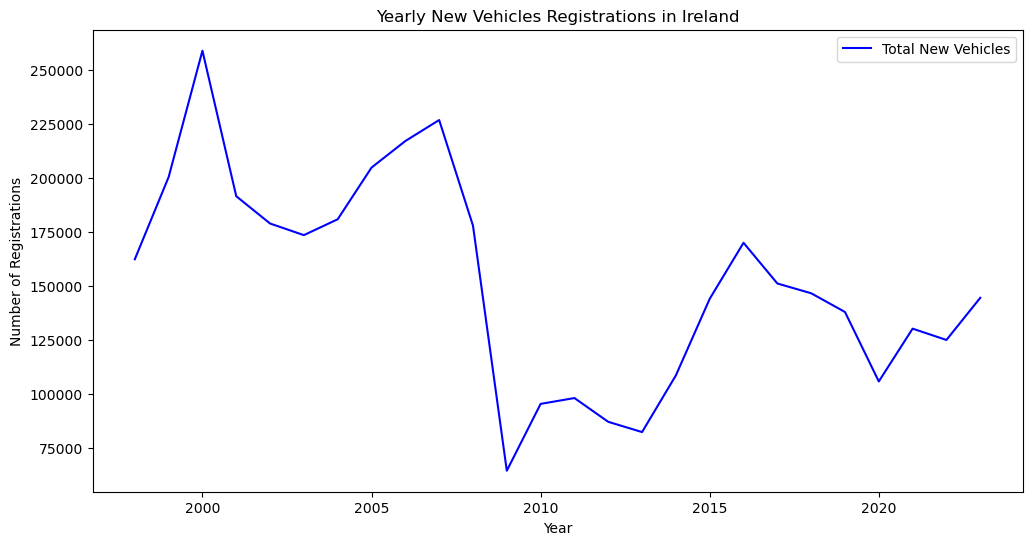

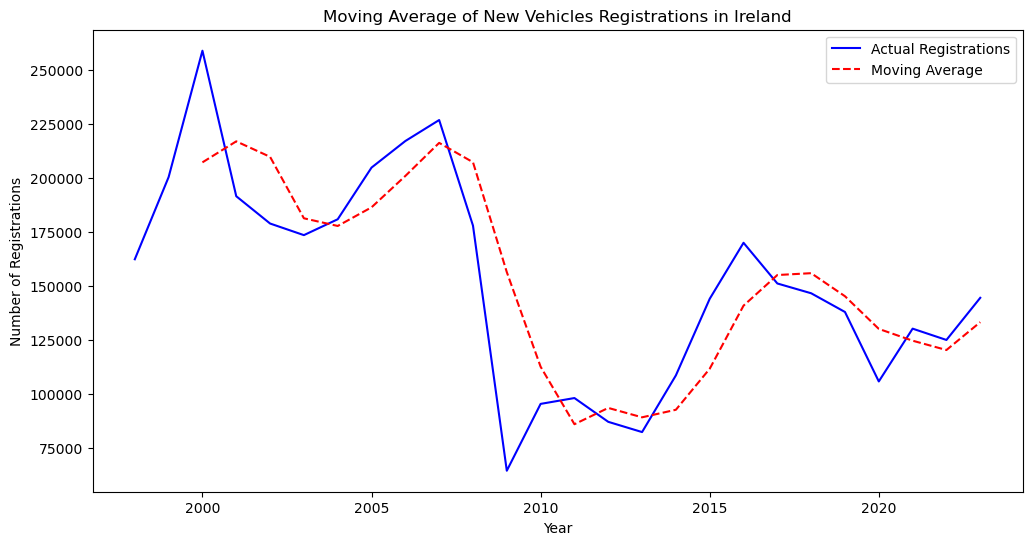

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(dfir_yearly['Total New Vehicles'], label='Total New Vehicles', color='blue')
plt.title('Yearly New Vehicles Registrations in Ireland')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.legend()
plt.show()

moving_average = dfir_yearly['Total New Vehicles'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(dfir_yearly['Total New Vehicles'], label='Actual Registrations', color='blue')
plt.plot(moving_average, label='Moving Average', color='red', linestyle='--')
plt.title('Moving Average of New Vehicles Registrations in Ireland')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.legend()
plt.show()

Slope: -3511.335384615385
Intercept: 7212018.4061538465
Correlation coefficient: -0.5507492889726302
p-value: 0.0035493312757051794
Standard error: 1086.2453465146446


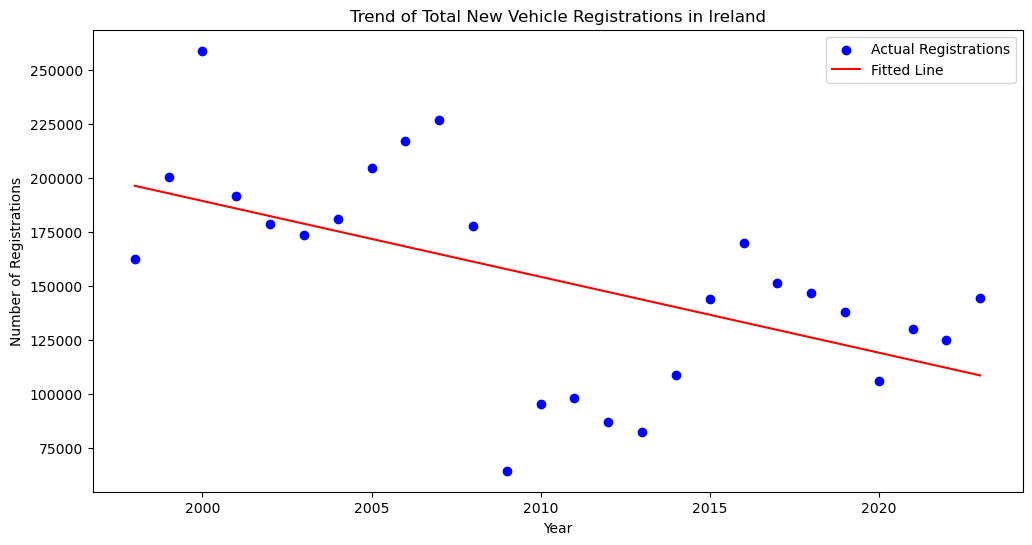

In [40]:
from scipy.stats import linregress

years = merged_data['Year']
total_vehicles = merged_data['Total New Vehicles']

slope, intercept, r_value, p_value, std_err = linregress(years, total_vehicles)

print("Slope:", slope)
print("Intercept:", intercept)
print("Correlation coefficient:", r_value)
print("p-value:", p_value)
print("Standard error:", std_err)

plt.figure(figsize=(12, 6))
plt.scatter(years, total_vehicles, color='blue', label='Actual Registrations')
plt.plot(years, intercept + slope * years, 'r', label='Fitted Line')
plt.title('Trend of Total New Vehicle Registrations in Ireland')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.legend()
plt.show()

Slope: -0.1312847867854803
Intercept: 267.45820233218717
Correlation coefficient: -0.7186547779372278
p-value: 3.5433638095848916e-05
Standard error: 0.025930002699109413


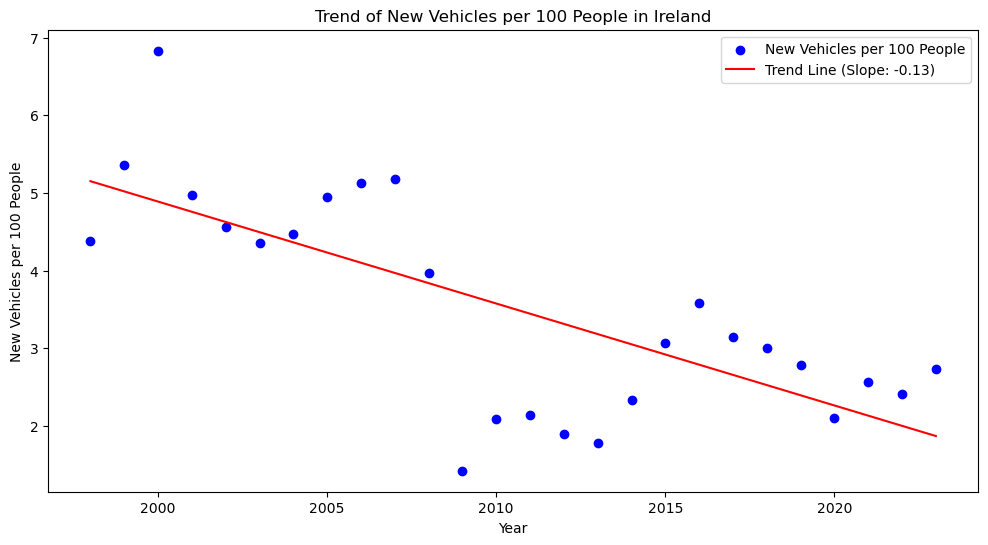

In [41]:
from scipy.stats import linregress

merged_data['Total New Vehicles Per 100 People'] = (merged_data['Total New Vehicles'] / merged_data['Population']) * 100

slope, intercept, r_value, p_value, std_err = linregress(merged_data['Year'], merged_data['Total New Vehicles Per 100 People'])

print("Slope:", slope)
print("Intercept:", intercept)
print("Correlation coefficient:", r_value)
print("p-value:", p_value)
print("Standard error:", std_err)

plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Year'], merged_data['Total New Vehicles Per 100 People'], color='blue', label='New Vehicles per 100 People')
plt.plot(merged_data['Year'], intercept + slope * merged_data['Year'], 'r', label=f'Trend Line (Slope: {slope:.2f})')
plt.title('Trend of New Vehicles per 100 People in Ireland')
plt.xlabel('Year')
plt.ylabel('New Vehicles per 100 People')
plt.legend()
plt.show()


Correlation coefficient between population change and total new vehicle registrations change: -0.20348786797236407


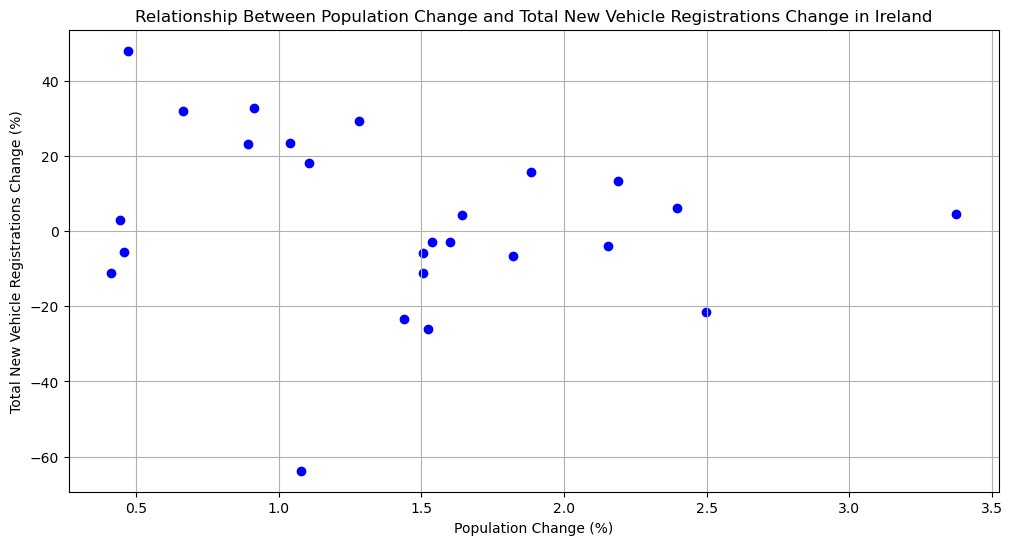

In [42]:
merged_data['Population_Change'] = merged_data['Population'].pct_change() * 100
merged_data['Total_New_Vehicles_Change'] = merged_data['Total New Vehicles'].pct_change() * 100

merged_data_clean = merged_data.dropna()

correlation = merged_data_clean['Population_Change'].corr(merged_data_clean['Total_New_Vehicles_Change'])

print("Correlation coefficient between population change and total new vehicle registrations change:", correlation)

plt.figure(figsize=(12, 6))
plt.scatter(merged_data_clean['Population_Change'], merged_data_clean['Total_New_Vehicles_Change'], color='blue')
plt.title('Relationship Between Population Change and Total New Vehicle Registrations Change in Ireland')
plt.xlabel('Population Change (%)')
plt.ylabel('Total New Vehicle Registrations Change (%)')
plt.grid(True)
plt.show()

In [43]:
merged_data.head()

,Year,New Private Cars,New Goods Vehicles,Total New Vehicles,Population,New_Vehicles_Per_100_People,Total New Vehicles Per 100 People,Population_Change,Total_New_Vehicles_Change
0,1998,138539.0,23810.0,162349.0,3703100.0,4.384138,4.384138,NaN,NaN
1,1999,170322.0,30066.0,200388.0,3741600.0,5.355677,5.355677,1.039669,23.430388
2,2000,225269.0,33606.0,258875.0,3789500.0,6.831376,6.831376,1.280201,29.186877
3,2001,160908.0,30622.0,191530.0,3847200.0,4.978426,4.978426,1.522628,-26.014486
4,2002,150485.0,28412.0,178897.0,3917200.0,4.566961,4.566961,1.819505,-6.595834


In [44]:
from scipy.stats import f_oneway

def perform_anova_test_population_vehicle(df, period=5):
    df['Period'] = (df['Year'] // period) * period
    grouped_population = df.groupby('Period')['Population'].apply(list)
    grouped_vehicles_per_100 = df.groupby('Period')['Total New Vehicles Per 100 People'].apply(list)
    grouped_new_vehicles = df.groupby('Period')['Total New Vehicles'].apply(list)

    anova_population = f_oneway(*grouped_population)
    anova_vehicles_per_100 = f_oneway(*grouped_vehicles_per_100)
    anova_new_vehicles = f_oneway(*grouped_new_vehicles)

    return anova_population, anova_vehicles_per_100, anova_new_vehicles

anova_population_result, anova_vehicles_per_100_result, anova_new_vehicles_result = perform_anova_test_population_vehicle(merged_data)
print("ANOVA Test for Population:", anova_population_result)
print("ANOVA Test for Total Vehicles per 100 People:", anova_vehicles_per_100_result)
print("ANOVA Test for Total New Vehicles:", anova_new_vehicles_result)


ANOVA Test for Population: F_onewayResult(statistic=84.77303767475127, pvalue=9.19114227648579e-13)
ANOVA Test for Total Vehicles per 100 People: F_onewayResult(statistic=8.522895708117344, pvalue=0.000187561313953382)
ANOVA Test for Total New Vehicles: F_onewayResult(statistic=5.508260951291868, pvalue=0.0023930007811472148)


In [45]:
merged_data.head()

,Year,New Private Cars,New Goods Vehicles,Total New Vehicles,Population,New_Vehicles_Per_100_People,Total New Vehicles Per 100 People,Population_Change,Total_New_Vehicles_Change,Period
0,1998,138539.0,23810.0,162349.0,3703100.0,4.384138,4.384138,NaN,NaN,1995
1,1999,170322.0,30066.0,200388.0,3741600.0,5.355677,5.355677,1.039669,23.430388,1995
2,2000,225269.0,33606.0,258875.0,3789500.0,6.831376,6.831376,1.280201,29.186877,2000
3,2001,160908.0,30622.0,191530.0,3847200.0,4.978426,4.978426,1.522628,-26.014486,2000
4,2002,150485.0,28412.0,178897.0,3917200.0,4.566961,4.566961,1.819505,-6.595834,2000


In [50]:
column_names = ['Population', 'Total New Vehicles Per 100 People', 'Total New Vehicles']
def perform_t_tests_with_named_periods(df, column_names, period=5):
    results = {}
    start_year = df['Year'].min()
    df['Period'] = ((df['Year'] - start_year) // period) * period + start_year

    for column_name in column_names:
        grouped_data = df.groupby('Period')[column_name].apply(list)
        periods = list(grouped_data.index)

        t_test_results = []
        for i in range(len(periods) - 1):
            for j in range(i+1, len(periods)):
                result = ttest_ind(grouped_data[periods[i]], grouped_data[periods[j]], equal_var=False)
                period_name_i = f"{periods[i]}-{periods[i] + period - 1}"
                period_name_j = f"{periods[j]}-{periods[j] + period - 1}"
                t_test_results.append((f'Period {period_name_i} vs Period {period_name_j}', result))

        results[column_name] = t_test_results

    return results


t_test_results_named_periods = perform_t_tests_with_named_periods(merged_data, column_names)
for column, results in t_test_results_named_periods.items():
    print(f"T-Test Results for {column}:")
    for period_comparison, result in results:
        print(f"{period_comparison}: {result}")
    print("\n")

T-Test Results for Population:
Period 1998-2002 vs Period 2003-2007: TtestResult(statistic=-4.442513904518183, pvalue=0.004079810083784083, df=6.1692274704632055)
Period 1998-2002 vs Period 2008-2012: TtestResult(statistic=-17.670424546736363, pvalue=2.722757377031448e-06, df=5.838136740340269)
Period 1998-2002 vs Period 2013-2017: TtestResult(statistic=-17.458296592710298, pvalue=1.2852873577098603e-07, df=7.940483651673205)
Period 1998-2002 vs Period 2018-2022: TtestResult(statistic=-19.312495453787673, pvalue=1.3314571816393828e-07, df=7.401651726257486)
Period 1998-2002 vs Period 2023-2027: TtestResult(statistic=nan, pvalue=nan, df=1.0)
Period 2003-2007 vs Period 2008-2012: TtestResult(statistic=-5.4495136983334875, pvalue=0.003716909509727537, df=4.57085427938204)
Period 2003-2007 vs Period 2013-2017: TtestResult(statistic=-6.985761666991728, pvalue=0.00047197693999255253, df=5.867318595831621)
Period 2003-2007 vs Period 2018-2022: TtestResult(statistic=-10.08617423081174, pvalue=

In [52]:
def t_test_with_widgets_updated(df):
    column_dropdown = widgets.Dropdown(
        options=['Total New Vehicles', 'Population', 'Total New Vehicles Per 100 People'],
        description='Column:'
    )

    # Dropdowns for selecting the periods with start and end years
    periods = sorted(df['Period'].unique())
    period_options = [(f"{period}-{period + 4}", period) for period in periods]
    period_dropdown_1 = widgets.Dropdown(
        options=period_options,
        description='Period 1:'
    )
    period_dropdown_2 = widgets.Dropdown(
        options=period_options,
        description='Period 2:'
    )

    # Function to perform t-test and display results
    def perform_and_display_t_test(column, period1, period2):
        group1 = df[df['Period'] == period1][column].dropna()
        group2 = df[df['Period'] == period2][column].dropna()
        t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
        print(f"T-Test between {period1}-{period1 + 4} and {period2}-{period2 + 4} for '{column}':")
        print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

    # Button to run the t-test
    button = widgets.Button(description="Run T-Test")
    button.on_click(lambda b: perform_and_display_t_test(
        column_dropdown.value, 
        period_dropdown_1.value, 
        period_dropdown_2.value
    ))

    display(column_dropdown, period_dropdown_1, period_dropdown_2, button)

# Apply the updated widget function to the merged data
t_test_with_widgets_updated(merged_data)


Dropdown(description='Column:', options=('Total New Vehicles', 'Population', 'Total New Vehicles Per 100 Peopl…

Dropdown(description='Period 1:', options=(('1998-2002', 1998), ('2003-2007', 2003), ('2008-2012', 2008), ('20…

Dropdown(description='Period 2:', options=(('1998-2002', 1998), ('2003-2007', 2003), ('2008-2012', 2008), ('20…

Button(description='Run T-Test', style=ButtonStyle())

T-Test between 1998-2002 and 2013-2017 for 'Total New Vehicles':
T-statistic: 2.9530, p-value: 0.0184


In [53]:
def perform_anova_test_by_rows(df, column_name, rows_per_group=60):

    temp_df = df.copy()
    temp_df['Group'] = temp_df.index // rows_per_group
    grouped_data = temp_df.groupby('Group')[column_name].apply(list)
    anova_result = f_oneway(*grouped_data)

    return anova_result

anova_test_ir = perform_anova_test_by_rows(dfir, 'Total New Vehicles')
print("ANOVA Test for Ireland:", anova_test_ir)
anova_test_nor = perform_anova_test_by_rows(dfnor, 'Total New Vehicles')
print("ANOVA Test for Norway:", anova_test_nor)


ANOVA Test for Ireland: F_onewayResult(statistic=11.163460695984453, pvalue=6.810601415306953e-10)
ANOVA Test for Norway: F_onewayResult(statistic=19.207346036580436, pvalue=1.2853269728351633e-16)


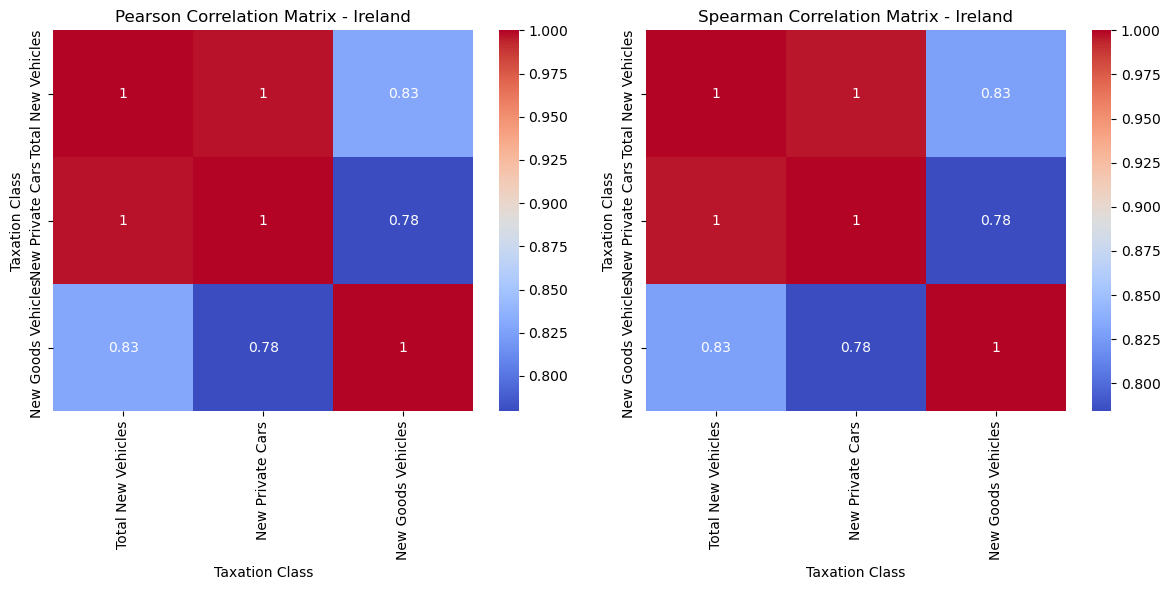

In [54]:
pearson_corr_ir = dfir[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].corr(method='pearson')
spearman_corr_ir = dfir[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].corr(method='spearman')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr_ir, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix - Ireland')

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr_ir, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix - Ireland')
plt.tight_layout()
plt.show()

Yüklediğiniz görselde Pearson ve Spearman korelasyon katsayıları için ısı haritası (heatmap) gösterilmektedir. 'Total New Vehicles' ve 'New Private Cars' arasındaki korelasyon katsayısının 1 olması, bu iki değişken arasında mükemmel bir doğrusal ilişki olduğunu gösterir. Yani, 'New Private Cars' değişkenindeki değişiklikler, 'Total New Vehicles' değişkenindeki değişiklikleri tam olarak yansıtıyor. Bu durum genellikle bir değişkenin diğer değişken tarafından tamamen açıklanabildiği veya veri setindeki bu iki sütunun aslında aynı bilgiyi içerdiği anlamına gelir. Bu, bir veri giriş hatası, veri işleme hatası veya bu iki değişkenin doğası gereği aynı değerleri içermesi gibi bir durumdan kaynaklanıyor olabilir.

Pearson ve Spearman korelasyon katsayılarının aynı değerleri göstermesi ise, veri setindeki ilişkinin hem doğrusal hem de monoton (sıralı) olduğunu gösterir. Yani, değişkenler arasındaki ilişki hem doğrusal hem de sıralama açısından tutarlıdır. Bu durum, özellikle değişkenler arasındaki ilişkinin hem doğrusal hem de sıralama bazında güçlü olduğu zamanlarda normaldir.

Ancak, 'Total New Vehicles' ve 'New Private Cars' arasındaki korelasyonun 1 olması beklenmedik bir durum olabilir ve bu, veri setinin daha detaylı incelenmesini gerektirebilir. Özellikle, bu iki sütunun aslında aynı verileri içerip içermediği veya bir hata sonucu aynı verilerin tekrarlanıp tekrarlanmadığı kontrol edilmelidir. Bu tür durumlar, veri toplama veya veri işleme aşamalarında meydana gelebilecek hatalardan kaynaklanabilir

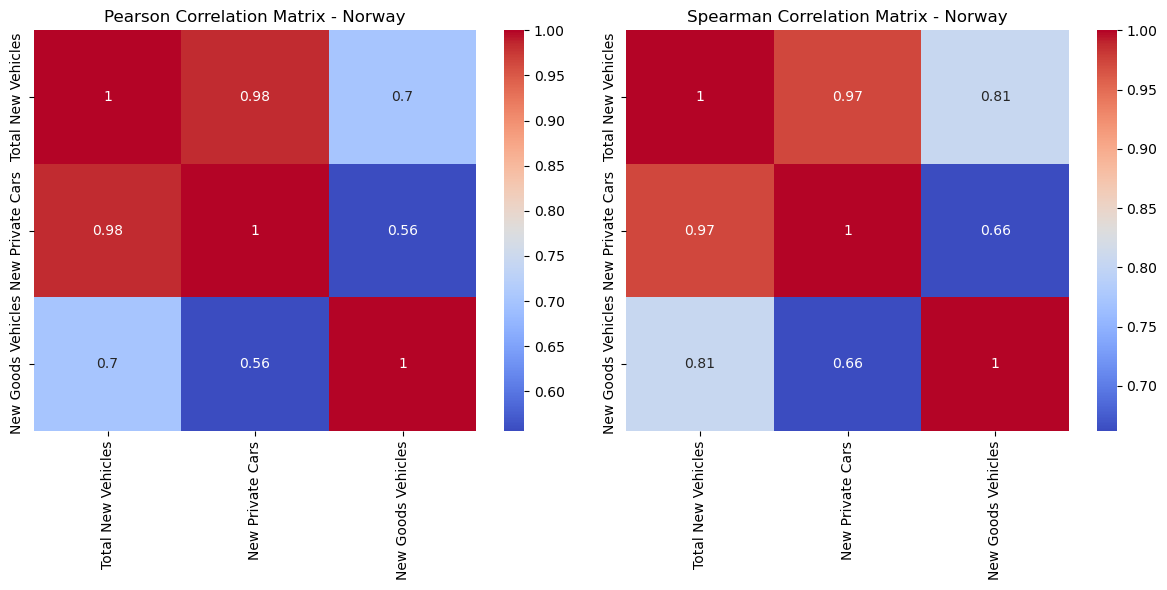

In [55]:
pearson_corr_nor = dfnor[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].corr(method='pearson')
spearman_corr_nor = dfnor[['Total New Vehicles', 'New Private Cars', 'New Goods Vehicles']].corr(method='spearman')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr_nor, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix - Norway')

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr_nor, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix - Norway')
plt.tight_layout()
plt.show()

## ikisi arasinda t testi

In [56]:
from scipy import stats

# Hypothesis testing for t-test
# H0: There is no significant difference in the number of registrations in specific vehicle categories between the two countries.
# H1: There is a significant difference in the number of registrations in specific vehicle categories between the two countries.

# Total Vehicles için T-testi
ttest_total_vehicles = stats.ttest_ind(dfir['Total New Vehicles'], dfnor['Total New Vehicles'], equal_var=False)

# New Private Cars için T-testi
ttest_private_cars = stats.ttest_ind(dfir['New Private Cars'], dfnor['New Private Cars'], equal_var=False)

# New Goods Vehicles için T-testi
ttest_goods_vehicles = stats.ttest_ind(dfir['New Goods Vehicles'], dfnor['New Goods Vehicles'], equal_var=False)

# T-testi sonuçlarını yazdırma
print("T-test for Total New Vehicles:", ttest_total_vehicles)
print("T-test for New Private Cars:", ttest_private_cars)
print("T-test for New Goods Vehicles:", ttest_goods_vehicles)


T-test for Total New Vehicles: TtestResult(statistic=-2.7213662123862528, pvalue=0.00677863926457097, df=409.4255330232386)
T-test for New Private Cars: TtestResult(statistic=-1.5239566894151424, pvalue=0.1283054451988899, df=402.1813071368933)
T-test for New Goods Vehicles: TtestResult(statistic=-9.214443781896396, pvalue=6.634606563626898e-19, df=548.3250141904805)


In [57]:
first_group_ir = dfir[(dfir['Month'] >= 199800) & (dfir['Month'] < 201013)]['Total New Vehicles']

second_group_ir = dfir[dfir['Month'] >= 201013]['Total New Vehicles']

ttest_results_ir = stats.ttest_ind(first_group_ir, second_group_ir, equal_var=False)

print(f"T-test results for Ireland: {ttest_results_ir}")

T-test results for Ireland: TtestResult(statistic=4.949471105544899, pvalue=1.2536601490729794e-06, df=294.84358675171273)


The statistical value is positive, meaning the average for the first group (1998-2010) is higher than for the second group (after 2010). The p-value is very small (much lower than 0.05), so we conclude there is a significant difference in 'Total New Vehicles' records between the two time periods. The number of 'Total New Vehicles' in the first group is statistically higher than in the second group. This might indicate a decrease or other change in total new vehicle registrations in Ireland after 2010.

In [58]:
first_group_nor = dfnor[(dfnor['month'] >= 199800) & (dfnor['month'] < 201013)]['Total New Vehicles']

second_group_nor = dfnor[dfnor['month'] >= 201013]['Total New Vehicles']

ttest_results_nor = stats.ttest_ind(first_group_nor, second_group_nor, equal_var=False)

print(f"T-test results for Ireland: {ttest_results_ir}")
print(f"T-test results for Norway: {ttest_results_nor}")

T-test results for Ireland: TtestResult(statistic=4.949471105544899, pvalue=1.2536601490729794e-06, df=294.84358675171273)
T-test results for Norway: TtestResult(statistic=-9.290712791242708, pvalue=1.1774890132681609e-17, df=231.11854546234466)


The statistical value is negative, indicating the average for the first group (1998-2010) is lower than for the second group (after 2010). The p-value is very small, so we conclude there's a significant difference in 'Total New Vehicles' records between these periods. The number of 'Total New Vehicles' for the second group is statistically higher than for the first group. This suggests an increase in total new vehicle registrations in Norway after 2010.

The p-value being well below the 0.05 significance threshold shows that the observed differences reflect a real change, not just random variation. These results indicate significant changes in total new vehicle registrations in both periods, with a decrease in Ireland and an increase in Norway.